In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

# Prophet
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot
from prophet.plot import plot_plotly, plot_components_plotly

#plotly configuration
import plotly.offline as py

from math import ceil

#Metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [2]:
train = pd.read_csv('sales_train_validation.csv')
calendar = pd.read_csv('calendar.csv')
prices = pd.read_csv('sell_prices.csv')
test = pd.read_csv('sales_train_evaluation.csv')

In [3]:
train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [4]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [6]:
date_price = prices.merge(calendar, on=['wm_yr_wk'], how = 'inner')

In [7]:
date_price.head()

,store_id,item_id,wm_yr_wk,sell_price,date,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,CA_1,HOBBIES_1_001,11325,9.58,2013-07-13,Saturday,1,7,2013,d_897,NaN,NaN,NaN,NaN,0,1,0
1,CA_1,HOBBIES_1_001,11325,9.58,2013-07-14,Sunday,2,7,2013,d_898,NaN,NaN,NaN,NaN,0,0,1
2,CA_1,HOBBIES_1_001,11325,9.58,2013-07-15,Monday,3,7,2013,d_899,NaN,NaN,NaN,NaN,0,1,1
3,CA_1,HOBBIES_1_001,11325,9.58,2013-07-16,Tuesday,4,7,2013,d_900,NaN,NaN,NaN,NaN,0,0,0
4,CA_1,HOBBIES_1_001,11325,9.58,2013-07-17,Wednesday,5,7,2013,d_901,NaN,NaN,NaN,NaN,0,0,0


In [8]:
date_price.shape

(47735397, 17)

In [9]:
TARGET = 'sales'        
END_TRAIN = 1913         
KEY_INDEX = ['id','d']

In [10]:
index_columns = ['id','item_id','dept_id','cat_id','store_id','state_id']
data_df = pd.melt(train, 
                  id_vars = index_columns, 
                  var_name = 'd', 
                  value_name = TARGET)

In [11]:
grid_test = pd.DataFrame()
for i in range(1,29):
    temp_df = train[index_columns]
    temp_df = temp_df
    temp_df['d'] = 'd_'+ str(END_TRAIN+i) 
    temp_df[TARGET] = np.nan
    grid_test = pd.concat([grid_test,temp_df])

/var/folders/4n/jdlmlz3172b2_7xcl0_55ns40000gn/T/ipykernel_15834/3701871016.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4n/jdlmlz3172b2_7xcl0_55ns40000gn/T/ipykernel_15834/3701871016.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
data_df = pd.concat([data_df,grid_test])
data_df = data_df.reset_index(drop=True) 

In [13]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0


In [14]:
del temp_df, grid_test

In [15]:
for col in index_columns:
    data_df[col] = data_df[col].astype('category')

In [16]:
def merge_by_concat(df1, df2, merge_on):
    merged_gf = df1[merge_on]
    merged_gf = merged_gf.merge(df2, on=merge_on, how='left')
    new_columns = [col for col in list(merged_gf) if col not in merge_on]
    df1 = pd.concat([df1, merged_gf[new_columns]], axis=1)
    return df1

In [17]:
release_df = prices.groupby(['store_id','item_id'])['wm_yr_wk'].agg(['min']).reset_index()
release_df.columns = ['store_id','item_id','release']
data_df = merge_by_concat(data_df, release_df, ['store_id','item_id'])
del release_df

In [18]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11325
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11121
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11401
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11106
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11117


In [19]:
data_df = merge_by_concat(data_df, calendar[['wm_yr_wk','d']], ['d'])
data_df = data_df[data_df['wm_yr_wk']>=data_df['release']] 
data_df = data_df.reset_index(drop=True)

In [20]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,wm_yr_wk
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12.0,11101,11101
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2.0,11101,11101
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11101,11101
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,11101,11101
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4.0,11101,11101


In [21]:
data_df['release'] = data_df['release'] - data_df['release'].min()
data_df['release'] = data_df['release'].astype(np.int16)

In [22]:
data_df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,wm_yr_wk
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12.0,0,11101
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2.0,0,11101
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4.0,0,11101
...,...,...,...,...,...,...,...,...,...,...
46881672,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,NaN,0,11617
46881673,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,NaN,0,11617
46881674,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,NaN,0,11617
46881675,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,NaN,230,11617


In [23]:
print('Saving Part 1 as pickle')
data_df.to_pickle('grid_part_1.pkl')
print('Done! Size of part 1:', data_df.shape)
del data_df

Saving Part 1 as pickle
Done! Size of part 1: (46881677, 10)


In [24]:
data_df = pd.read_pickle('grid_part_1.pkl')

In [25]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,wm_yr_wk
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12.0,0,11101
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2.0,0,11101
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4.0,0,11101


In [26]:
prices['price_max'] = prices.groupby(['store_id','item_id'])['sell_price'].transform('max')
prices['price_min'] = prices.groupby(['store_id','item_id'])['sell_price'].transform('min')
prices['price_std'] = prices.groupby(['store_id','item_id'])['sell_price'].transform('std')
prices['price_mean'] = prices.groupby(['store_id','item_id'])['sell_price'].transform('mean')

# Normalization
prices['price_norm'] = prices['sell_price']/prices['price_max']

prices['price_nunique'] = prices.groupby(['store_id','item_id'])['sell_price'].transform('nunique')
    
prices['item_nunique'] = prices.groupby(['store_id','sell_price'])['item_id'].transform('nunique')

In [27]:
calendar_prices = calendar[['wm_yr_wk','month','year']].drop_duplicates(subset=['wm_yr_wk'])

prices = prices.merge(calendar_prices[['wm_yr_wk','month','year']], on=['wm_yr_wk'], how='left')

del calendar_prices

In [28]:
prices['price_momentum'] = prices['sell_price']/prices.groupby(['store_id','item_id'])['sell_price'].transform(lambda x: x.shift(1))


prices['price_momentum_m'] = prices['sell_price']/prices.groupby(['store_id','item_id','month'])['sell_price'].transform('mean')


prices['price_momentum_y'] = prices['sell_price']/prices.groupby(['store_id','item_id','year'])['sell_price'].transform('mean')
# del prices['month'], prices['year']

In [29]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price,price_max,price_min,price_std,price_mean,price_norm,price_nunique,item_nunique,month,year,price_momentum,price_momentum_m,price_momentum_y
0,CA_1,HOBBIES_1_001,11325,9.58,9.58,8.26,0.152139,8.285714,1.000000,3,3,7,2013,NaN,1.127059,1.145166
1,CA_1,HOBBIES_1_001,11326,9.58,9.58,8.26,0.152139,8.285714,1.000000,3,3,7,2013,1.000000,1.127059,1.145166
2,CA_1,HOBBIES_1_001,11327,8.26,9.58,8.26,0.152139,8.285714,0.862213,3,5,7,2013,0.862213,0.971765,0.987377
3,CA_1,HOBBIES_1_001,11328,8.26,9.58,8.26,0.152139,8.285714,0.862213,3,5,8,2013,1.000000,1.000000,0.987377
4,CA_1,HOBBIES_1_001,11329,8.26,9.58,8.26,0.152139,8.285714,0.862213,3,5,8,2013,1.000000,1.000000,0.987377


In [30]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,wm_yr_wk
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12.0,0,11101
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2.0,0,11101
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4.0,0,11101


In [31]:
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)


def get_memory_usage():
    return np.round(psutil.Process(os.getpid()).memory_info()[0]/2.**30, 2) 


def reduce_mem_usage(df, verbose=True):
    # df: pandas dataframe to reduce size             
    # verbose: whether output
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min() # Get the minimum data type in whole pandas dataframe
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                       
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Memory usage decreased to {:5.2f} Mb now, with ({:.1f}% reduction saved)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [32]:
print('Merge prices')
original_columns = list(data_df) 
data_df = data_df.merge(prices, on=['store_id','item_id','wm_yr_wk'], how='left')
keep_columns = [col for col in list(data_df) if col not in original_columns]
data_df = data_df[KEY_INDEX+keep_columns]
data_df = reduce_mem_usage(data_df)

Merge prices
Memory usage decreased to 1878.05 Mb now, with (65.6% reduction saved)


In [33]:
data_df.to_pickle('grid_part_2.pkl')
print('Size:', data_df.shape)

del data_df


Size: (46881677, 15)


In [34]:
data_df = pd.read_pickle('grid_part_1.pkl')
data_df = data_df[KEY_INDEX]

In [35]:
icols = ['date',
         'd',
         'event_name_1',
         'event_type_1',
         'event_name_2',
         'event_type_2',
         'snap_CA',
         'snap_TX',
         'snap_WI']

data_df = data_df.merge(calendar[icols], on=['d'], how='left')

In [36]:
icols = ['event_name_1',
         'event_type_1',
         'event_name_2',
         'event_type_2',
         'snap_CA',
         'snap_TX',
         'snap_WI'] 
for col in icols:
    data_df[col] = data_df[col].astype('category')

In [37]:
data_df.head()

,id,d,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_008_CA_1_validation,d_1,2011-01-29,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_009_CA_1_validation,d_1,2011-01-29,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_1_010_CA_1_validation,d_1,2011-01-29,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_1_012_CA_1_validation,d_1,2011-01-29,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_1_015_CA_1_validation,d_1,2011-01-29,NaN,NaN,NaN,NaN,0,0,0


In [38]:
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['tm_d'] = data_df['date'].dt.isocalendar().day.astype(np.int8) # tm stands for time
data_df['tm_w'] = data_df['date'].dt.isocalendar().week.astype(np.int8)
data_df['tm_m'] = data_df['date'].dt.month.astype(np.int8)
data_df['tm_y'] = data_df['date'].dt.isocalendar().year
data_df['tm_y'] = (data_df['tm_y'] - data_df['tm_y'].min()).astype(np.int8)
data_df['tm_wm'] = data_df['tm_d'].apply(lambda x: ceil(x/7)).astype(np.int8)
data_df['tm_dw'] = data_df['date'].dt.dayofweek.astype(np.int8) 
data_df['tm_w_end'] = (data_df['tm_dw']>=5).astype(np.int8) 

# del data_df['date']

In [39]:
print('Save part 3')
data_df.to_pickle('grid_part_3.pkl')
print('Size:', data_df.shape)

del data_df

Save part 3
Size: (46881677, 17)


data_df = pd.read_pickle('grid_part_1.pkl')
data_df['d'] = data_df['d'].apply(lambda x: x[2:]).astype(np.int16)

del data_df['wm_yr_wk']

data_df.to_pickle('grid_part_1.pkl')
del data_df

In [40]:
data_df = pd.concat([pd.read_pickle('grid_part_1.pkl'),
                     pd.read_pickle('grid_part_2.pkl').iloc[:,2:],
                     pd.read_pickle('grid_part_3.pkl').iloc[:,2:]],
                     axis=1)

In [41]:
data_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,wm_yr_wk,...,snap_CA,snap_TX,snap_WI,tm_d,tm_w,tm_m,tm_y,tm_wm,tm_dw,tm_w_end
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12.0,0,11101,...,0,0,0,6,4,1,0,1,5,1
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2.0,0,11101,...,0,0,0,6,4,1,0,1,5,1
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101,...,0,0,0,6,4,1,0,1,5,1
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,0,11101,...,0,0,0,6,4,1,0,1,5,1
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4.0,0,11101,...,0,0,0,6,4,1,0,1,5,1


In [42]:
data_df = data_df.loc[:, ~data_df.columns.duplicated()]

In [43]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46881677 entries, 0 to 46881676
Data columns (total 38 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                category      
 1   item_id           category      
 2   dept_id           category      
 3   cat_id            category      
 4   store_id          category      
 5   state_id          category      
 6   d                 object        
 7   sales             float64       
 8   release           int16         
 9   wm_yr_wk          int64         
 10  sell_price        float16       
 11  price_max         float16       
 12  price_min         float16       
 13  price_std         float16       
 14  price_mean        float16       
 15  price_norm        float16       
 16  price_nunique     int8          
 17  item_nunique      int16         
 18  month             int8          
 19  year              int16         
 20  price_momentum    float16       
 21  price_

In [44]:
forc = data_df.loc[:,['price_mean','date']]

In [45]:
forc = forc.loc[:, ~forc.columns.duplicated()]

In [46]:
forc

,price_mean,date
0,0.476318,2011-01-29
1,1.764648,2011-01-29
2,2.980469,2011-01-29
3,6.468750,2011-01-29
4,0.706543,2011-01-29
...,...,...
46881672,2.800781,2016-05-22
46881673,2.507812,2016-05-22
46881674,4.117188,2016-05-22
46881675,1.280273,2016-05-22


In [47]:
forc = forc.dropna()

In [48]:
# rename the columns to match the required format
forc = forc.rename(columns={'date': 'ds', 'price_mean': 'y'})

In [49]:
forc['ds'] = pd.to_datetime(forc['ds'])


In [50]:
forc

,y,ds
0,0.476318,2011-01-29
1,1.764648,2011-01-29
2,2.980469,2011-01-29
3,6.468750,2011-01-29
4,0.706543,2011-01-29
...,...,...
46881672,2.800781,2016-05-22
46881673,2.507812,2016-05-22
46881674,4.117188,2016-05-22
46881675,1.280273,2016-05-22


In [51]:
sampled_df = forc.sample(n=100, random_state=42)

In [52]:
train_size = int(len(sampled_df) * 0.8)
train_df = sampled_df[:train_size]
test_df = sampled_df[train_size:]

# Prophet

In [53]:
from fbprophet import Prophet

# initialize the model
model = Prophet(yearly_seasonality=True)



In [54]:
# fit the model to the training data
m = model.fit(train_df)

import pickle
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(m, f)

future = model.make_future_dataframe(periods=52, freq='W-Fri')
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -108.536
Iteration  1. Log joint probability =    69.6409. Improved by 178.177.
Iteration  2. Log joint probability =    97.2543. Improved by 27.6134.
Iteration  3. Log joint probability =    109.916. Improved by 12.6617.
Iteration  4. Log joint probability =    111.477. Improved by 1.56124.
Iteration  5. Log joint probability =    111.733. Improved by 0.255395.
Iteration  6. Log joint probability =     111.74. Improved by 0.00744267.
Iteration  7. Log joint probability =    111.757. Improved by 0.0171337.
Iteration  8. Log joint probability =     111.79. Improved by 0.0331129.
Iteration  9. Log joint probability =    111.831. Improved by 0.0411907.
Iteration 10. Log joint probability =    111.854. Improved by 0.0229889.
Iteration 11. Log joint probability =    111.856. Improved by 0.00116762.
Iteration 12. Log joint probability =    112.156. Improved by 0.300658.
Iteration 13. Log joint probability =    112.175. Improved by 0.0191059.
Iteration 14. Log

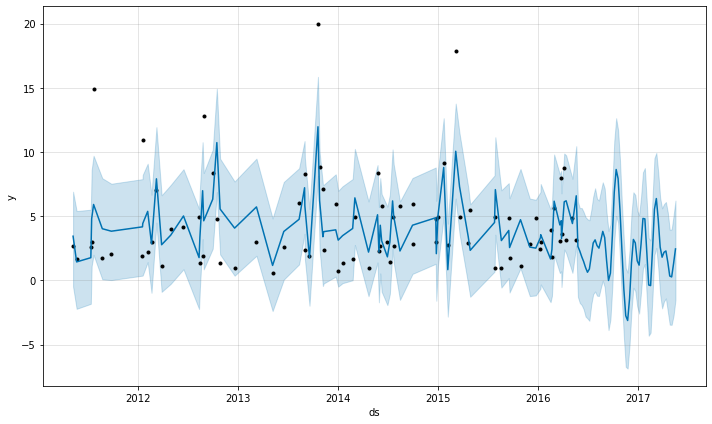

In [55]:
fig = model.plot(forecast)

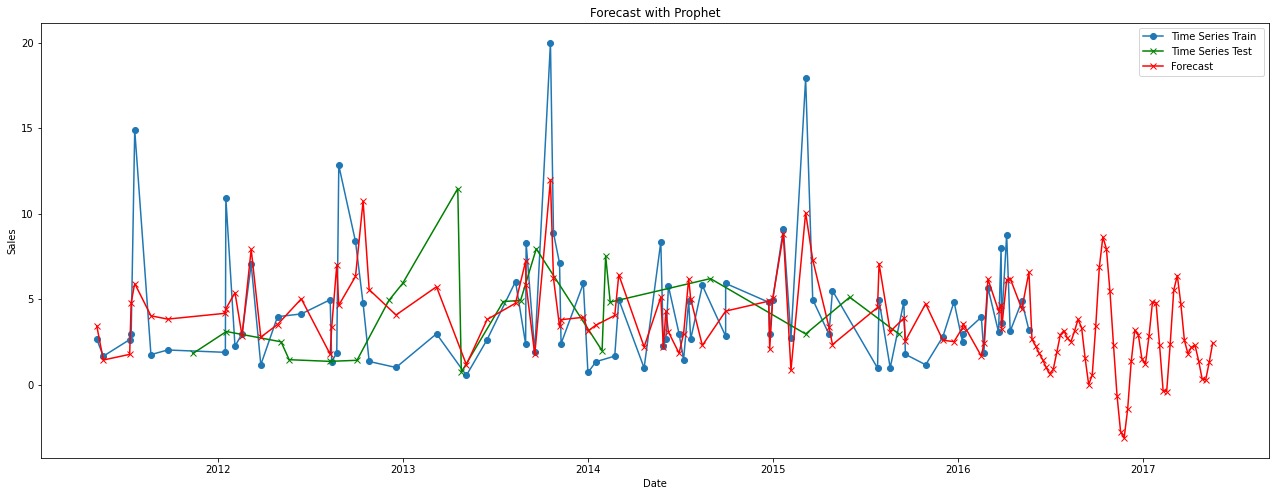

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))

train_df = train_df.sort_values('ds')
test_df = test_df.sort_values('ds')
plt.plot(train_df['ds'], train_df['y'], 'o-')

plt.plot(test_df['ds'], test_df['y'], 'x-', color='green')
plt.plot(forecast["ds"], forecast["yhat"], "x-", color="red")

plt.legend(['Time Series Train ','Time Series Test','Forecast'])
plt.title("Forecast with Prophet")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

# ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
sampled_df2 = forc.sample(n=2000, random_state=42)
sampled_df2 = sampled_df2.sort_values("ds")
sampled_df2 = sampled_df2.set_index("ds")


In [ ]:
sampled_df2

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(sampled_df2["y"])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


In [ ]:
data_diff = sampled_df2["y"].diff().dropna()


In [ ]:
plt.plot(data_diff)
plt.show()


In [ ]:
result_diff = adfuller(data_diff)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])


In [ ]:
model = ARIMA(sampled_df2["y"], order=(1,2,1))
results = model.fit()


In [ ]:
import pickle
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(results, f)

In [ ]:
print(results.summary())


In [ ]:
sampled_df2.tail(200)

In [ ]:
start_index = len(sampled_df2['y']) - 200
start_element = sampled_df2.index[-200]

end_index = len(sampled_df2['y'])
end_element = sampled_df2.index[-1]

predictions = results.predict(start=start_element, end=end_element)


In [ ]:
plt.plot(predictions)
plt.show()


In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(sampled_df2[:][:1600].index,sampled_df2[:][:1600].values, label='Training')
plt.plot(sampled_df2[:][1600:].index, sampled_df2[:][1600:].values, label='Test')
plt.plot(predictions.index, predictions.values, label='Forecast')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = sampled_df2['y'][:201] # actual values
y_pred = predictions # predicted values

rmse = sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
rmse

In [ ]:
feature_cols = ['release', 'sell_price', 'price_max', 'price_min', 'price_std', 'price_mean', 'price_norm', 'price_nunique', 'item_nunique', 'month', 'year', 'price_momentum', 'price_momentum_m', 'price_momentum_y']
target_col = 'sales'
train_dataset = lgb.Dataset(sampled_df2[feature_cols], label=sampled_df2[target_col])


# LSTM

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
